# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [237]:
import pandas as pd
import numpy as np

In [238]:
import seaborn as sns

### ipython magic to plot in a notebook

In [239]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [240]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

### Open the saved text in Jupyter

In [241]:
f = open('livedeal.txt','r')

### Convert opened file to Pandas dataframe.

In [242]:
k = f.readlines()

In [243]:
r = k[0].split(',')

In [244]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [245]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(headposition[i-1], headposition[i])
        #print(r[headposition[i-1] : headposition[i]])
        testlist.append(r[headposition[i-1] : headposition[i]])

In [246]:
df = pd.DataFrame(testlist)

In [247]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,"{""deals"":[{""deal"":{""id"":""9482""","""benchmarks"":{""values"":[968",1301,2,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""7618493611779815""","""totalPayout"":""0""","""lastBillTS"":""2018-09-23T14:16:29Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
1,"{""deal"":{""id"":""9323""","""benchmarks"":{""values"":[520",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,"""status"":1","""blockedBalance"":""1155368863071923933""","""totalPayout"":""14794930674860366975""","""lastBillTS"":""2018-09-23T14:14:47Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,None
2,"{""deal"":{""id"":""9324""","""benchmarks"":{""values"":[28087",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""57398086909238975""","""totalPayout"":""729730342488525826""","""lastBillTS"":""2018-09-23T14:14:44Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
3,"{""deal"":{""id"":""9325""","""benchmarks"":{""values"":[2818",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""5670904925030168""","""totalPayout"":""70612406078260631""","""lastBillTS"":""2018-09-23T14:14:44Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None
4,"{""deal"":{""id"":""9306""","""benchmarks"":{""values"":[1407",998,2,64000000,150000000,1000000,1000000,0,0,...,"""status"":1","""blockedBalance"":""7401048554881946""","""totalPayout"":""117586921741341754""","""lastBillTS"":""2018-09-23T14:14:14Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [248]:
df[15]

0     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
1     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
2     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
3     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
4     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
5     "consumerID":"0x417c92FbD944b125A578848DE44a4F...
6     "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
7     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
8     "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
9     "consumerID":"0xeFe1976D528FdeAC56E09115462dDe...
10    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
11    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
12    "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
13    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
14    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
15    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
16    "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
17    "consumerID":"0x18CB84498d67635F14BA20A7A5

### Make a little funtion to trim unnecessary charactors

In [249]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [250]:
df['consumer_ID'] = df[15].apply(Supplier_ID_conversion)

In [251]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""9482""","""benchmarks"":{""values"":[968",1301,2,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""7618493611779815""","""totalPayout"":""0""","""lastBillTS"":""2018-09-23T14:16:29Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
1,"{""deal"":{""id"":""9323""","""benchmarks"":{""values"":[520",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,"""blockedBalance"":""1155368863071923933""","""totalPayout"":""14794930674860366975""","""lastBillTS"":""2018-09-23T14:14:47Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
2,"{""deal"":{""id"":""9324""","""benchmarks"":{""values"":[28087",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""57398086909238975""","""totalPayout"":""729730342488525826""","""lastBillTS"":""2018-09-23T14:14:44Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
3,"{""deal"":{""id"":""9325""","""benchmarks"":{""values"":[2818",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""5670904925030168""","""totalPayout"":""70612406078260631""","""lastBillTS"":""2018-09-23T14:14:44Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7
4,"{""deal"":{""id"":""9306""","""benchmarks"":{""values"":[1407",998,2,64000000,150000000,1000000,1000000,0,0,...,"""blockedBalance"":""7401048554881946""","""totalPayout"":""117586921741341754""","""lastBillTS"":""2018-09-23T14:14:14Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [252]:
df[14]

0     "supplierID":"0x10B3Fe7B225b9fF0294CAa76d5d9F8...
1     "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
2     "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
3     "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
4     "supplierID":"0x4023A8e997C09f97DA89aaB99AC7C5...
5     "supplierID":"0x4023A8e997C09f97DA89aaB99AC7C5...
6     "supplierID":"0xaE7DB91DeC00E3Be062C7dC3328859...
7     "supplierID":"0x730F19B7FA079EBfDc7360066ec593...
8     "supplierID":"0x730F19B7FA079EBfDc7360066ec593...
9     "supplierID":"0xb555e1090E00cA010d08aFE7f7a7F6...
10    "supplierID":"0x4FC67349467228BF3e57A8eaAf135D...
11    "supplierID":"0x4FC67349467228BF3e57A8eaAf135D...
12    "supplierID":"0x0c750db3cB057A8D5034881d95ea4E...
13    "supplierID":"0xF7B151a72459e0F7921773e310cFA8...
14    "supplierID":"0xeB6C9fA6f61D33d21b41C1f97dAFD0...
15    "supplierID":"0xc364C71bAFAA85671C4d45E5Cf61bf...
16    "supplierID":"0xc364C71bAFAA85671C4d45E5Cf61bf...
17    "supplierID":"0x8546601F9b4AcF1dc99C72cc48

In [253]:
df['supplier_ID'] = df[14].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [254]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [255]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [256]:
df[19]

0       "price":"115105293180"
1     "price":"17063469722222"
2       "price":"841730329700"
3        "price":"81450116527"
4       "price":"109854838908"
5      "price":"8952944000000"
6       "price":"133333333333"
7        "price":"69795782683"
8        "price":"63584648010"
9      "price":"1388888888888"
10    "price":"41206963611111"
11       "price":"75188994204"
12    "price":"40637063888888"
13     "price":"1206202206125"
14      "price":"148374311175"
15      "price":"112108490910"
16      "price":"203162683744"
17        "price":"2777777777"
18     "price":"1388888888888"
19     "price":"8333333333333"
20     "price":"1121431188375"
21                 "price":"0"
22        "price":"2777777777"
23      "price":"115107260416"
24      "price":"171418514409"
25       "price":"81835237874"
26    "price":"45049680000000"
27      "price":"179966328780"
28      "price":"115625756448"
29       "price":"87920916426"
30     "price":"6334913055555"
31      "price":"100481047344"
32    "p

In [257]:
df['price_USD/h'] = df[19].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [258]:
df[10]

0             0
1      72155000
2             0
3             0
4             0
5      44947000
6             0
7             0
8             0
9             0
10    173181000
11            0
12    172105000
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26    186283000
27            0
28            0
29            0
30     26661000
31            0
32     43376000
33            0
34            0
35            0
36            0
37            0
38     59101000
39            0
40            0
41            0
42    186411000
43    186198000
44     48544000
45     19778000
46            0
47            0
48    240009000
49            0
50            0
51     18393000
52            0
53            0
54            0
55     64992000
56     76731000
57            0
58            0
Name: 10, dtype: object

In [259]:
float(df[10][0])/1000000

0.0

In [260]:
def Ethash_conversion(content):
    return float(content)/1000000

In [261]:
Ethash_conversion(df[10][0])

0.0

In [262]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [263]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""9482""","""benchmarks"":{""values"":[968",1301,2,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.000414,0.000
1,"{""deal"":{""id"":""9323""","""benchmarks"":{""values"":[520",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.061428,72.155
2,"{""deal"":{""id"":""9324""","""benchmarks"":{""values"":[28087",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.003030,0.000
3,"{""deal"":{""id"":""9325""","""benchmarks"":{""values"":[2818",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000293,0.000
4,"{""deal"":{""id"":""9306""","""benchmarks"":{""values"":[1407",998,2,64000000,150000000,1000000,1000000,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0.000395,0.000


##  master ID

In [264]:
df[16]

0     "masterID":"0x416Af57F633e292b25976573a460d7C3...
1     "masterID":"0x94CE08B2018Ede760757eb2892591e91...
2     "masterID":"0x94CE08B2018Ede760757eb2892591e91...
3     "masterID":"0x94CE08B2018Ede760757eb2892591e91...
4     "masterID":"0x257308430e87b7E45816Bda27DC76cbF...
5     "masterID":"0x257308430e87b7E45816Bda27DC76cbF...
6     "masterID":"0xf5c532D26cA0394822C1052989bfD36D...
7     "masterID":"0x29D518e8A3EEA4f92f6dB0FC8F52d8AA...
8     "masterID":"0x29D518e8A3EEA4f92f6dB0FC8F52d8AA...
9     "masterID":"0x7a37B02bBbeCdeB297dDbb62593A1e0e...
10    "masterID":"0xE0E924b23852b7a4cEA3183dBaC056af...
11    "masterID":"0xE0E924b23852b7a4cEA3183dBaC056af...
12    "masterID":"0xE0E924b23852b7a4cEA3183dBaC056af...
13    "masterID":"0xFe388151D3d862f6A6178876eA5Cc4E5...
14    "masterID":"0x4e452D1EB085A15d3f9544Ffedf9F82e...
15    "masterID":"0x7610dd9944615263d9858101Dd197C90...
16    "masterID":"0x7610dd9944615263d9858101Dd197C90...
17    "masterID":"0xf8D2b12c03f82EF61E106DE5dd69

In [265]:
def Master_ID_conversion(content):
    return content[12:-1]

In [266]:
df['master_ID'] =  df[16].apply(Master_ID_conversion)

# Run statistics for suppliers

In [267]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,1.0,172.105000,NaN,172.105,172.10500,172.1050,172.10500,172.105
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x18f2e789765a9423dA886ef3bAFa5ad8553b3795,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,1.0,240.009000,NaN,240.009,240.00900,240.0090,240.00900,240.009
0x291363C19f6e278F1479a9374489413e756efA64,1.0,18.393000,NaN,18.393,18.39300,18.3930,18.39300,18.393
0x2BF1A2Ea696CD1684F2dd90E759b72433f0b501F,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x2DeBd108c1561905C89c4707891a6612c50402c8,3.0,14.458667,25.043145,0.000,0.00000,0.0000,21.68800,43.376
0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,2.0,22.473500,31.782328,0.000,11.23675,22.4735,33.71025,44.947
0x47012859fC5cB44d6106D54ff77580c85C380ecc,1.0,48.544000,NaN,48.544,48.54400,48.5440,48.54400,48.544


In [268]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [269]:
df10.to_csv('eth.csv')

In [270]:
df11 = pd.read_csv('eth.csv')

In [271]:
df11['total_Ethash']= df11['count']*df11['mean']

In [272]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.105,1.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.000,1.0
2,0x18f2e789765a9423dA886ef3bAFa5ad8553b3795,0.000,1.0
3,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,1.0
4,0x291363C19f6e278F1479a9374489413e756efA64,18.393,1.0
5,0x2BF1A2Ea696CD1684F2dd90E759b72433f0b501F,0.000,1.0
6,0x2DeBd108c1561905C89c4707891a6612c50402c8,43.376,3.0
7,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,44.947,2.0
8,0x47012859fC5cB44d6106D54ff77580c85C380ecc,48.544,1.0
9,0x491028A2510F1f9f10650272f780f2da1302bd73,59.101,4.0


In [273]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
3,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,1.0
13,0x672Ee945a55327328472B1a02437293945157f4C,186.411,2.0
29,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0
12,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,3.0
10,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.181,2.0
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.105,1.0
17,0x8015Cb7EDb97c352b8e10a7E4d87623B5A8230CD,141.723,2.0
30,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,72.155,3.0
9,0x491028A2510F1f9f10650272f780f2da1302bd73,59.101,4.0
8,0x47012859fC5cB44d6106D54ff77580c85C380ecc,48.544,1.0


In [274]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [275]:
df12.to_csv('ethash.csv', index = False)

In [276]:
df13 = pd.read_csv('ethash.csv')

In [277]:
df13

,supplier_ID,total_Ethash,count
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,1.0
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,2.0
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0
3,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,3.0
4,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.181,2.0
5,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.105,1.0
6,0x8015Cb7EDb97c352b8e10a7E4d87623B5A8230CD,141.723,2.0
7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,72.155,3.0
8,0x491028A2510F1f9f10650272f780f2da1302bd73,59.101,4.0
9,0x47012859fC5cB44d6106D54ff77580c85C380ecc,48.544,1.0


In [278]:
df13['total_Ethash'].sum()

1618.8650000001999

In [279]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1618.865 Mh/s


## supplier's revenue

In [280]:
df13['supplier_ID'][0]

'0x1a5d1841078be8d8f2b54D4F3264438a69e94C94'

In [281]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.19215360000000001

In [282]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [283]:
total_revenue(df13['supplier_ID'][0])

0.19215360000000001

In [284]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [285]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [286]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [287]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [288]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,1.0,0.192154,4.611686,$4.61
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,2.0,0.159408,3.825793,$3.83
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0,0.163091,3.914173,$3.91
3,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,3.0,0.159498,3.827958,$3.83
4,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.181,2.0,0.148616,3.566778,$3.57


In [289]:
sns.set()

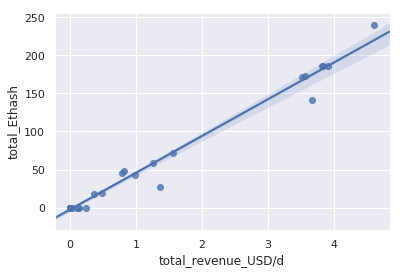

In [290]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

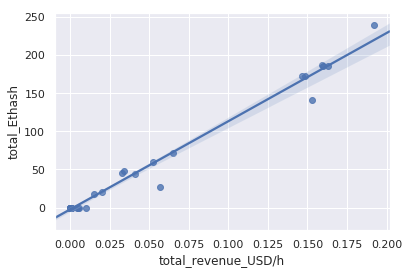

In [291]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

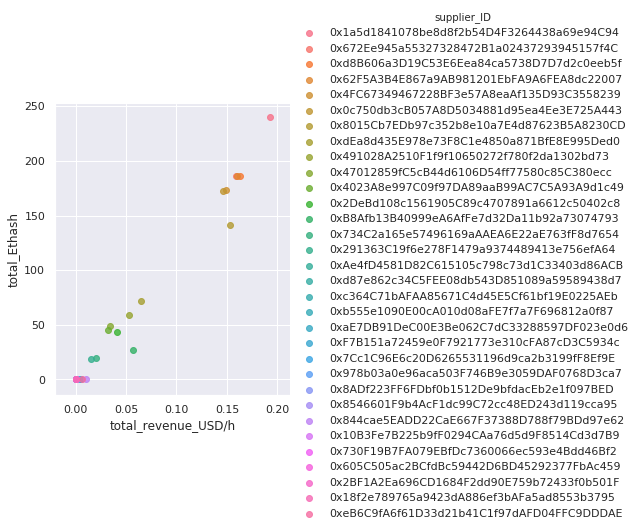

In [292]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [293]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,240.009,1.0,$4.61
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,2.0,$3.83
2,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,186.283,3.0,$3.91
3,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,186.198,3.0,$3.83
4,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.181,2.0,$3.57
5,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.105,1.0,$3.51
6,0x8015Cb7EDb97c352b8e10a7E4d87623B5A8230CD,141.723,2.0,$3.67
7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,72.155,3.0,$1.55
8,0x491028A2510F1f9f10650272f780f2da1302bd73,59.101,4.0,$1.26
9,0x47012859fC5cB44d6106D54ff77580c85C380ecc,48.544,1.0,$0.81


In [294]:
df13['total_revenue_USD/d'].sum()

35.246139900604305

In [295]:
df13['total_revenue_USD/d'].sum()

35.246139900604305

In [296]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'35.25'

In [297]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 35.25 USD/day is spent on the entire SONM platform.


# Run the same statistics for master_ID

In [298]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,1.0,240.009000,NaN,240.009,240.00900,240.0090,240.00900,240.009
0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,48.544000,NaN,48.544,48.54400,48.5440,48.54400,48.544
0x257308430e87b7E45816Bda27DC76cbF739fCD30,2.0,22.473500,31.782328,0.000,11.23675,22.4735,33.71025,44.947
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731
0x393DB0070C377303c959CEcd288fC383DF37b2C4,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x416Af57F633e292b25976573a460d7C3200feD34,9.0,62.099111,93.148682,0.000,0.00000,0.0000,186.19800,186.411
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,3.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000


In [299]:
df20 = df.groupby('master_ID').describe()['Ethash']

In [300]:
df20.to_csv('mastereth.csv')

In [301]:
df21 = pd.read_csv('mastereth.csv')

In [302]:
df21['total_Ethash']= df21['count']*df21['mean']

In [303]:
df21.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,1.0,240.0090,NaN,240.009,240.00900,240.0090,240.00900,240.009,240.009
2,0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,48.5440,NaN,48.544,48.54400,48.5440,48.54400,48.544,48.544
3,0x257308430e87b7E45816Bda27DC76cbF739fCD30,2.0,22.4735,31.782328,0.000,11.23675,22.4735,33.71025,44.947,44.947
4,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2.0,0.0000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000


In [304]:
df21[['master_ID','total_Ethash','count']]

,master_ID,total_Ethash,count
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,0.000,1.0
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,1.0
2,0x25158E6f8dD683d222E3785BA2294A319489084E,48.544,1.0
3,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0
4,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,0.000,2.0
5,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
6,0x393DB0070C377303c959CEcd288fC383DF37b2C4,0.000,1.0
7,0x416Af57F633e292b25976573a460d7C3200feD34,558.892,9.0
8,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0.000,3.0
9,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,7.0


In [305]:
df22 = df21[['master_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [306]:
df22.head()

,master_ID,total_Ethash,count
7,0x416Af57F633e292b25976573a460d7C3200feD34,558.892,9.0
18,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.286,3.0
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,1.0
5,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
9,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,7.0


In [307]:
df22.to_csv('masterethash.csv', index = False)

In [308]:
df23 = pd.read_csv('masterethash.csv')

In [309]:
df23

,master_ID,total_Ethash,count
0,0x416Af57F633e292b25976573a460d7C3200feD34,558.892,9.0
1,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.286,3.0
2,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,1.0
3,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0
4,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,7.0
5,0x94CE08B2018Ede760757eb2892591e9147033040,72.155,3.0
6,0x25158E6f8dD683d222E3785BA2294A319489084E,48.544,1.0
7,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0
8,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,26.661,4.0
9,0x6F6B9a47668D96b3758D79c67c30A290934a759F,19.778,3.0


In [310]:
def total_master_revenue(address):
    return df[df.master_ID == address]['price_USD/h'].sum()

In [311]:
df23['total_revenue_USD/h'] = df23['master_ID'].apply(total_master_revenue)

In [312]:
df23['total_revenue_USD/d'] = df23['total_revenue_USD/h'] *24

In [313]:
df23['revenue_USD/d'] = df23['total_revenue_USD/d'].map('${:,.2f}'.format)

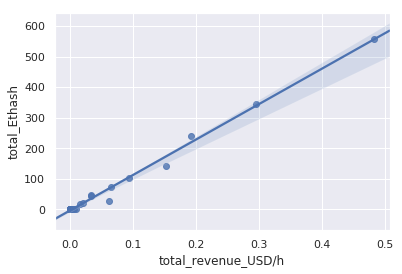

In [314]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df23)

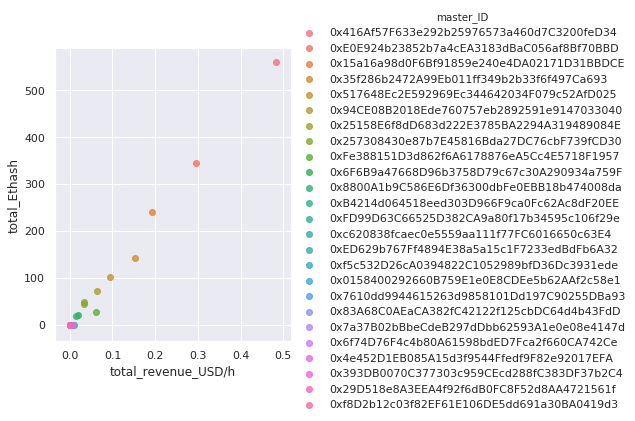

In [315]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df23, fit_reg=False, hue='master_ID', legend=True)

In [316]:
df23[['master_ID','total_Ethash','count','revenue_USD/d']]

,master_ID,total_Ethash,count,revenue_USD/d
0,0x416Af57F633e292b25976573a460d7C3200feD34,558.892,9.0,$11.58
1,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,345.286,3.0,$7.08
2,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,240.009,1.0,$4.61
3,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0,$3.67
4,0x517648Ec2E592969Ec344642034F079c52AfD025,102.477,7.0,$2.25
5,0x94CE08B2018Ede760757eb2892591e9147033040,72.155,3.0,$1.55
6,0x25158E6f8dD683d222E3785BA2294A319489084E,48.544,1.0,$0.81
7,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.947,2.0,$0.78
8,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,26.661,4.0,$1.47
9,0x6F6B9a47668D96b3758D79c67c30A290934a759F,19.778,3.0,$0.48


# Run the same statistics for consumers

In [317]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,18.0,63.535667,77.872775,0.000,0.00000,23.2195,147.11750,186.411
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731
0x417c92FbD944b125A578848DE44a4FD9132E0911,3.0,111.166667,111.595227,44.947,46.74550,48.5440,144.27650,240.009
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,28.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0xeFe1976D528FdeAC56E09115462dDedB26254BF7,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000


In [318]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [319]:
df10.to_csv('consumer.csv')

In [320]:
df11 = pd.read_csv('consumer.csv')

In [321]:
df11['total_Ethash']= df11['mean']*df11['count']

In [322]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,18.0,63.535667,77.872775,0.000,0.00000,23.2195,147.11750,186.411,1143.642
1,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723
2,0x417c92FbD944b125A578848DE44a4FD9132E0911,3.0,111.166667,111.595227,44.947,46.74550,48.5440,144.27650,240.009,333.500
3,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
4,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,28.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
5,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000
6,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000
8,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000


In [323]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [324]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [325]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [326]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [327]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,18.0,63.535667,77.872775,0.000,0.00000,23.2195,147.11750,186.411,1143.642,1.008193,24.196635,$24.20
1,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,0.153000,3.672000,$3.67
2,0x417c92FbD944b125A578848DE44a4FD9132E0911,3.0,111.166667,111.595227,44.947,46.74550,48.5440,144.27650,240.009,333.500,0.258258,6.198184,$6.20
3,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000,0.000000,$0.00
4,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,28.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.029138,0.699321,$0.70


In [328]:
df11.sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,18.0,63.535667,77.872775,0.000,0.00000,23.2195,147.11750,186.411,1143.642,1.008193e+00,2.419664e+01,$24.20
2,0x417c92FbD944b125A578848DE44a4FD9132E0911,3.0,111.166667,111.595227,44.947,46.74550,48.5440,144.27650,240.009,333.500,2.582576e-01,6.198184e+00,$6.20
1,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,1.530000e-01,3.672000e+00,$3.67
4,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,28.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,2.913838e-02,6.993211e-01,$0.70
3,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
5,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,6.220800e-10,1.492992e-08,$0.00
8,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,1.000000e-02,2.400000e-01,$0.24
6,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000,1.000000e-02,2.400000e-01,$0.24
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00


In [329]:
df11 = df11.sort_values(['total_Ethash','count'], ascending = False)

In [330]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,18.0,63.535667,77.872775,0.000,0.00000,23.2195,147.11750,186.411,1143.642,1.008193,24.196635,$24.20
2,0x417c92FbD944b125A578848DE44a4FD9132E0911,3.0,111.166667,111.595227,44.947,46.74550,48.5440,144.27650,240.009,333.500,0.258258,6.198184,$6.20
1,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,70.861500,8.300727,64.992,67.92675,70.8615,73.79625,76.731,141.723,0.153000,3.672000,$3.67
4,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,28.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.029138,0.699321,$0.70
3,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,0.000,0.000000,0.000000,$0.00


In [331]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']].sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,total_Ethash,count,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,1143.642,18.0,$24.20
2,0x417c92FbD944b125A578848DE44a4FD9132E0911,333.500,3.0,$6.20
1,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,141.723,2.0,$3.67
4,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0.000,28.0,$0.70
3,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,2.0,$0.00
5,0x83A68C0AEaCA382fC42122f125cbDC64d4b43FdD,0.000,2.0,$0.00
8,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,0.000,2.0,$0.24
6,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,0.000,1.0,$0.00


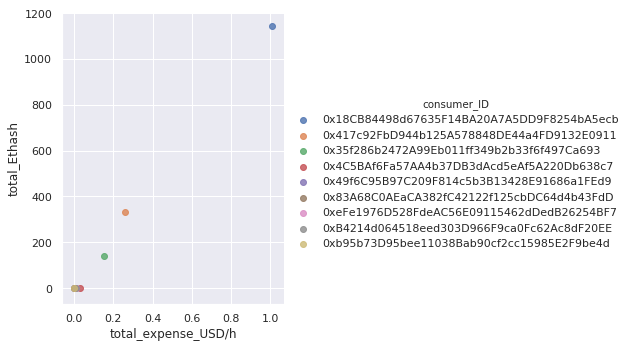

In [332]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [333]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
5,"{""deal"":{""id"":""9305""","""benchmarks"":{""values"":[508",998,2,512000000,67108864,1000000,1000000,2,4285816832,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0.032231,44.947,0x257308430e87b7E45816Bda27DC76cbF739fCD30
44,"{""deal"":{""id"":""8066""","""benchmarks"":{""values"":[503",776,2,512000000,67108864,1000000,1000000,1,11720982528,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0.033873,48.544,0x25158E6f8dD683d222E3785BA2294A319489084E
48,"{""deal"":{""id"":""9037""","""benchmarks"":{""values"":[506",1145,2,512000000,67108864,1000000,1000001,7,4238344192,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0.192154,240.009,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE


In [334]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [335]:
df12 = df12.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [336]:
df12[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
48,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,0.192154,240.009,"{""deal"":{""id"":""9037"""
44,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0x25158E6f8dD683d222E3785BA2294A319489084E,0.033873,48.544,"{""deal"":{""id"":""8066"""
5,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0x257308430e87b7E45816Bda27DC76cbF739fCD30,0.032231,44.947,"{""deal"":{""id"":""9305"""


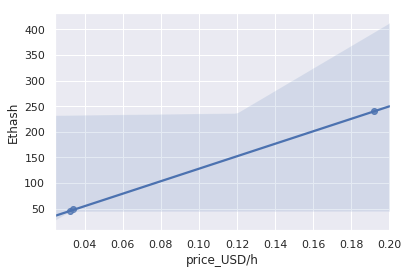

In [337]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

In [338]:
from scipy import stats

In [339]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df12.Ethash,df12['price_USD/h'])

In [340]:
slope

0.00082314135508089296

In [341]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")

Current profitability (USD/h) = 0.000823141355081 * Ethash(Mh/s)


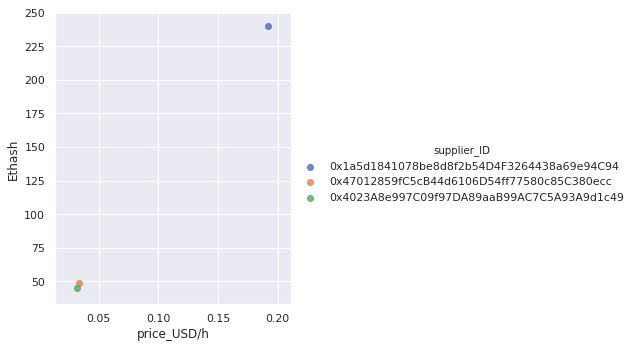

In [342]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

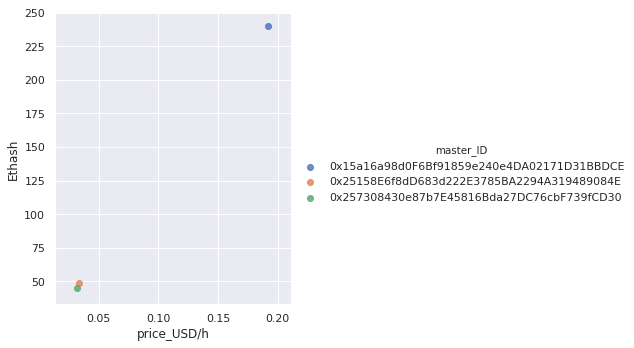

In [343]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='master_ID', legend=True)

In [344]:
0.194853 * 1.05

0.20459565000000002

# Conclusions

In [345]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('GPU-Connor currently has '+ str(len(df12)) + ' deals.')

print('GPU-Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('GPU-Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


Real-time total Ethash rate of the entire SONM platform is 1618.865 Mh/s.
At this moment, total 35.25 USD/day are spent on the entire SONM platform.
GPU-Connor currently has 3 deals.
GPU-Connor currently pays 6.20 USD/day.
GPU-Connor currently mines ETH with 333.5 Mh/s hashrate.
There are 25 unique suppliers at this moment.
There are 11 unique GPU sppliers at this moment.
There are 14 unique CPU sppliers at this moment.
There are 9 unique consumers at this moment.
Currenlty, there are total 59 deals.
Of which 16 deals contain GPU.
And 43 deals are CPU only.


# profitablility calculator

GPU card  EThash  SONM profitability
Nvida GTX 1050 TI   15 Mh/s  0.0127 USD/h 
Nvida GTX 1060    24 Mh/s  0.0201 USD/h
Nvida GTX 1070 TI   32 Mh/s  0.0274 USD/h
Nvida GTX 1080    27 Mh/s  0.0231 USD/h
Nvida GTX 1080 TI   37 Mh/s  0.0317 USD/h
Nvida GTX TITAN   40 Mh/s  0.0343 USD/h
Nvida GTX 1080 (with Pill) 40Mh/s 0.0343 USD/h
Nvida GTX 1080 TI (with Pill) 50 Mh/s 0.0429 USD/h

In [346]:
print("Current profitability (USD/h) = " + str(slope) + " * Ethash(Mh/s)")
print(" ")
print("GPU card                EThash     SONM profitability")
print("Nvida GTX 1050 TI       15 Mh/s    " + str("{:.2f}".format(slope*15*24))+ " USD/day")
print("Nvida GTX 1060          24 Mh/s    " + str("{:.2f}".format(slope*24*24))+ " USD/day")
print("Nvida GTX 1070 TI       32 Mh/s    " + str("{:.2f}".format(slope*32*24))+ " USD/day")
print("Nvida GTX 1080          27 Mh/s    " + str("{:.2f}".format(slope*27*24))+ " USD/day")
print("Nvida GTX 1080 TI       37 Mh/s    " + str("{:.2f}".format(slope*37*24))+ " USD/day")
print("Nvida GTX TITAN         40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 +pill    40 Mh/s    " + str("{:.2f}".format(slope*40*24))+ " USD/day")
print("Nvida GTX 1080 TI +pill 50 Mh/s    " + str("{:.2f}".format(slope*50*24))+ " USD/day")






Current profitability (USD/h) = 0.000823141355081 * Ethash(Mh/s)
 
GPU card                EThash     SONM profitability
Nvida GTX 1050 TI       15 Mh/s    0.30 USD/day
Nvida GTX 1060          24 Mh/s    0.47 USD/day
Nvida GTX 1070 TI       32 Mh/s    0.63 USD/day
Nvida GTX 1080          27 Mh/s    0.53 USD/day
Nvida GTX 1080 TI       37 Mh/s    0.73 USD/day
Nvida GTX TITAN         40 Mh/s    0.79 USD/day
Nvida GTX 1080 +pill    40 Mh/s    0.79 USD/day
Nvida GTX 1080 TI +pill 50 Mh/s    0.99 USD/day


# CPU connor

In [347]:
def benchmark(content):
    return int(content[content.find('[')+1:])

In [348]:
df['benchmark'] = df[1].apply(benchmark)

In [349]:
df[df.consumer_ID == '0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7']

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID,benchmark
0,"{""deals"":[{""deal"":{""id"":""9482""","""benchmarks"":{""values"":[968",1301,2,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.000414,0.0,0x416Af57F633e292b25976573a460d7C3200feD34,968
2,"{""deal"":{""id"":""9324""","""benchmarks"":{""values"":[28087",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.003030,0.0,0x94CE08B2018Ede760757eb2892591e9147033040,28087
3,"{""deal"":{""id"":""9325""","""benchmarks"":{""values"":[2818",2111,32,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xdEa8d435E978e73F8C1e4850a871BfE8E995Ded0,0.000293,0.0,0x94CE08B2018Ede760757eb2892591e9147033040,2818
4,"{""deal"":{""id"":""9306""","""benchmarks"":{""values"":[1407",998,2,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x4023A8e997C09f97DA89aaB99AC7C5A93A9d1c49,0.000395,0.0,0x257308430e87b7E45816Bda27DC76cbF739fCD30,1407
7,"{""deal"":{""id"":""8699""","""benchmarks"":{""values"":[668",1079,2,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.000251,0.0,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,668
8,"{""deal"":{""id"":""8698""","""benchmarks"":{""values"":[606",1079,2,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W10=""}",None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.000229,0.0,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,606
11,"{""deal"":{""id"":""9318""","""benchmarks"":{""values"":[1386",998,2,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.000271,0.0,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,1386
13,"{""deal"":{""id"":""9468""","""benchmarks"":{""values"":[5590",1661,4,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xF7B151a72459e0F7921773e310cFA87cD3C5934c,0.004342,0.0,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,5590
14,"{""deal"":{""id"":""8616""","""benchmarks"":{""values"":[671",777,24,64000001,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xeB6C9fA6f61D33d21b41C1f97dAFD04FFC9DDDAE,0.000534,0.0,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,671
15,"{""deal"":{""id"":""9466""","""benchmarks"":{""values"":[587",842,2,64000000,150000000,1000000,1000000,0,0,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,None,0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7,0xc364C71bAFAA85671C4d45E5Cf61bf19E0225AEb,0.000404,0.0,0x7610dd9944615263d9858101Dd197C90255DBa93,587


In [350]:
df_cpu = df[df.consumer_ID == '0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7']

In [351]:
df_cpu['price_USD/h'].sum()*24

0.6993211416754751

In [352]:
len(df_cpu)

28

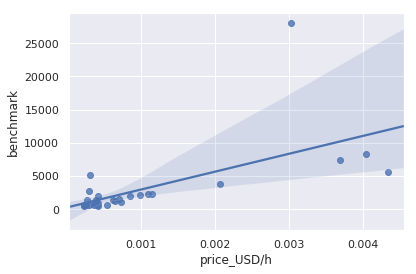

In [353]:
sns.regplot( y="benchmark", x="price_USD/h", data=df_cpu)

In [354]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('GPU-Connor currently has '+ str(len(df12)) + ' deals.')

print('GPU-Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('GPU-Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df23))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df23[df23['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df23)-len(df23[df23['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')


print('CPU-Connor currently has '+ str(len(df_cpu)) + ' deals.')

print('CPU-Connor currently pays ' + str("{:.2f}".format(df_cpu['price_USD/h'].sum()*24)) + " USD/day.") 


Real-time total Ethash rate of the entire SONM platform is 1618.865 Mh/s.
At this moment, total 35.25 USD/day are spent on the entire SONM platform.
GPU-Connor currently has 3 deals.
GPU-Connor currently pays 6.20 USD/day.
GPU-Connor currently mines ETH with 333.5 Mh/s hashrate.
There are 25 unique suppliers at this moment.
There are 11 unique GPU sppliers at this moment.
There are 14 unique CPU sppliers at this moment.
There are 9 unique consumers at this moment.
Currenlty, there are total 59 deals.
Of which 16 deals contain GPU.
And 43 deals are CPU only.
CPU-Connor currently has 28 deals.
CPU-Connor currently pays 0.70 USD/day.


# My deals

0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb

In [217]:
df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
3,"{""deal"":{""id"":""3462""","""benchmarks"":{""values"":[2003",538,8,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000010,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
6,"{""deal"":{""id"":""3457""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000100,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
7,"{""deal"":{""id"":""3458""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000100,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
8,"{""deal"":{""id"":""6672""","""benchmarks"":{""values"":[107",1380,48,512000001,67108864,1000000,1000000,4,11720982528,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4RT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0.116382,129.860,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F
9,"{""deal"":{""id"":""2040""","""benchmarks"":{""values"":[824",788,1,800000000,10000000000,500000000,300000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xaE7DB91DeC00E3Be062C7dC33288597DF023e0d6,0.000480,0.000,0xf5c532D26cA0394822C1052989bfD36Dc3931ede
22,"{""deal"":{""id"":""3471""","""benchmarks"":{""values"":[1004",513,6,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0.000010,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
26,"{""deal"":{""id"":""3469""","""benchmarks"":{""values"":[1002",538,8,256000000,67108864,1000000,1000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0.000010,0.000,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3
28,"{""deal"":{""id"":""7338""","""benchmarks"":{""values"":[511",1102,2,512000000,67108864,1000002,1000000,10,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.176600,219.579,0xedB7Ae4B946Cf249349974A02e354B5FBC577798


In [218]:
df32 = df[df.consumer_ID == '0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb']

In [219]:
df32 = df32.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [220]:
df32[['consumer_ID', 'supplier_ID', 'master_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,master_ID,price_USD/h,Ethash,0
28,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.176600,219.579,"{""deal"":{""id"":""7338"""
8,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,0.116382,129.860,"{""deal"":{""id"":""6672"""
9,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xaE7DB91DeC00E3Be062C7dC33288597DF023e0d6,0xf5c532D26cA0394822C1052989bfD36Dc3931ede,0.000480,0.000,"{""deal"":{""id"":""2040"""
6,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000100,0.000,"{""deal"":{""id"":""3457"""
7,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000100,0.000,"{""deal"":{""id"":""3458"""
3,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000010,0.000,"{""deal"":{""id"":""3462"""
22,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x8546601F9b4AcF1dc99C72cc48ED243d119cca95,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000010,0.000,"{""deal"":{""id"":""3471"""
26,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7Cc1C96E6c20D6265531196d9ca2b3199fF8Ef9E,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.000010,0.000,"{""deal"":{""id"":""3469"""


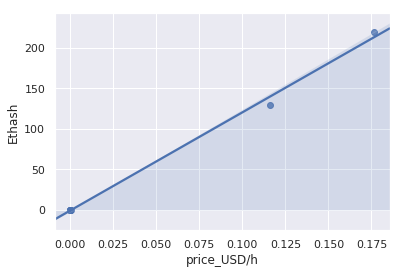

In [221]:
sns.regplot( y="Ethash", x="price_USD/h", data=df32)

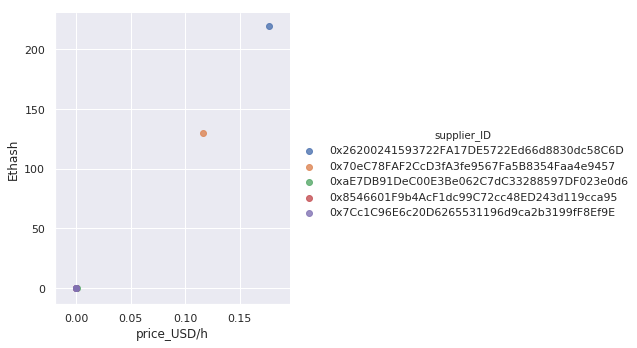

In [222]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='supplier_ID', legend=True)

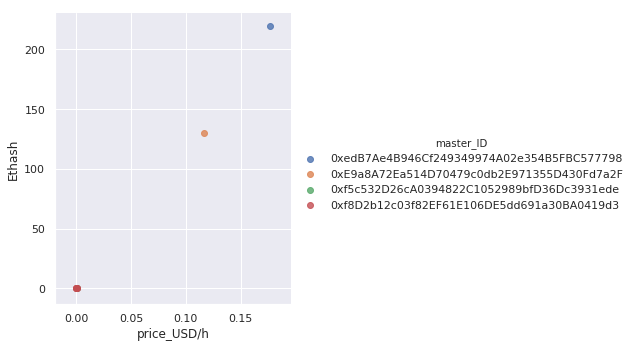

In [223]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df32, fit_reg=False, hue='master_ID', legend=True)

0x416Af57F633e292b25976573a460d7C3200feD34

In [224]:
df[df.master_ID == '0x416Af57F633e292b25976573a460d7C3200feD34']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID
1,"{""deal"":{""id"":""7511""","""benchmarks"":{""values"":[512",1300,2,512000000,67108864,1000000,1000000,7,8511291392,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.136546,186.283,0x416Af57F633e292b25976573a460d7C3200feD34
11,"{""deal"":{""id"":""7614""","""benchmarks"":{""values"":[504",1301,2,512000000,67108864,1000000,1000000,1,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.018319,26.617,0x416Af57F633e292b25976573a460d7C3200feD34
13,"{""deal"":{""id"":""7613""","""benchmarks"":{""values"":[504",1301,2,512000000,67108864,1000000,1000000,6,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.117698,159.749,0x416Af57F633e292b25976573a460d7C3200feD34
14,"{""deal"":{""id"":""7612""","""benchmarks"":{""values"":[508",1302,2,512000000,67108864,1000000,1000000,3,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0.058253,79.683,0x416Af57F633e292b25976573a460d7C3200feD34
15,"{""deal"":{""id"":""7611""","""benchmarks"":{""values"":[508",1302,2,512000000,67108864,1000000,1000000,4,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x62F5A3B4E867a9AB981201EbFA9A6FEA8dc22007,0.077671,106.515,0x416Af57F633e292b25976573a460d7C3200feD34
16,"{""deal"":{""id"":""7626""","""benchmarks"":{""values"":[508",1300,2,512000000,67108864,1000001,1000000,7,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ND...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x672Ee945a55327328472B1a02437293945157f4C,0.137253,186.411,0x416Af57F633e292b25976573a460d7C3200feD34


In [225]:
df[df.supplier_ID =='0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797']

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,master_ID


In [226]:
0.0574884648 *1.05

0.06036288804

In [227]:
0.060362889

0.060362889

In [228]:
0.1/125

0.0008

Current profitablility USD/h = 0.0008 * Ethash (Mh/s)

In [237]:
0.192154 * 1.05

0.2017617